# CONEXIONES E IMPORTACIONES

In [1]:
# Para tratamiento de datos
import pandas as pd
import numpy as np

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Definir fechas de referencia (para Bonus)
from datetime import datetime

# Estudio Churn (para Bonus)
from lifelines import KaplanMeierFitter

# Para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None) 

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

df_activity = pd.read_csv("./dataset/Customer_Flight_Activity.csv")
df_loyalty = pd.read_csv("./dataset/Customer_Loyalty_History.csv")

In [2]:
# Creamos funcion para homogeneizar los nombres de las columnas, cambiando a minúsculas y reemplazando espacios por guiones bajos

def limpieza_columnas(df):
    nuevas_columnas = {}
    for col in df.columns:
        nuevas_columnas[col] = col.lower().replace(" ", "_")

    nuevas_columnas
    df.rename(columns = nuevas_columnas, inplace = True)
    return df.head()

# Exploración

## Exploración df_activity

In [3]:
# Información general del DF. 405624 entradas, 9 columnas.
df_activity.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [4]:
df_activity.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [5]:
df_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [6]:
df_activity.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [7]:
# Se localizan muchos duplicados en la columna de "Loyalty Number".
# Damos por hecho que cada registro en el DF corresponde a una actividad distinta del cliente, por lo que en este caso no eliminamos duplicados.
df_activity["Loyalty Number"].value_counts()

Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64

In [8]:
limpieza_columnas(df_activity)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


## Exploración df_loyalty

In [9]:
# Información general del DF. 16737 entradas, 15 columnas.
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [10]:
# Se encuentran valores nulos en fecha de cancelación de membresía (no conviene eliminarlas ya que supone que el cliente sigue siendo miembro). 
# Bastantes datos de salario anual vacíos. Lo necesitaremos para análisis, por lo que se tratarán más adelante.
df_loyalty.isnull().sum() 

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [11]:
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [12]:
df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [13]:
# No se localizan duplicados.
df_loyalty["Loyalty Number"].value_counts()

Loyalty Number
480934    1
208485    1
455896    1
469781    1
533488    1
         ..
922188    1
780529    1
721438    1
761015    1
652627    1
Name: count, Length: 16737, dtype: int64

In [14]:
# se localizan valores negativos en la columna de salario. Representa un 0.1% aprox del total, por lo que ignoramos esos registros.

df_loyalty = df_loyalty[df_loyalty['Salary'] >= 0] 
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN
7,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,NaN,NaN
8,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,NaN,NaN


In [15]:
limpieza_columnas(df_loyalty)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN
7,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,NaN,NaN
8,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,NaN,NaN


In [16]:
# De cara al análsis, es interesante unir las columnas de año y mes tanto en inscripción como en cancelación en la membresía.
# Al haber nulos en la fecha de cancelación, se crea una nueva columna de "status" para identificarlos y de cara al análsis se puedan filtrar fácilmente.

df_loyalty["enrollment_date"] = pd.to_datetime({
    'year': df_loyalty['enrollment_year'],
    'month': df_loyalty['enrollment_month'],
    'day': 1
})
df_loyalty["cancellation_date"] = pd.to_datetime({
    'year': df_loyalty['cancellation_year'],
    'month': df_loyalty['cancellation_month'],
    'day': 1
})
df_loyalty["status"]= np.where(df_loyalty["cancellation_date"].isnull(), "Active", "Cancelled")

# Eliminamos las columnas de años y meses ya que tenemos las fechas completas.
columnas_borrar = ["enrollment_year", "enrollment_month", "cancellation_year", "cancellation_month"]
df_loyalty.drop(columns=columnas_borrar, inplace=True)

# Unión y Limpieza

In [17]:
# Unimos ambos dataframes usando la columna "loyalty_number"
df_final = df_activity.merge(df_loyalty, left_on= "loyalty_number", right_on= "loyalty_number")
df_final

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_date,cancellation_date,status
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016-08-01,NaT,Active
1,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015-08-01,NaT,Active
2,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014-01-01,NaT,Active
3,100301,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,70323.0,Divorced,Nova,48356.96,Standard,2013-09-01,NaT,Active
4,100364,2017,1,0,0,0,0,0.0,0,0,Canada,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,76849.0,Married,Nova,5143.88,Standard,2015-05-01,NaT,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302467,999891,2018,11,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016-05-01,2017-01-01,Cancelled
302468,999891,2018,12,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016-05-01,2017-01-01,Cancelled
302469,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012-08-01,NaT,Active
302470,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017-07-01,NaT,Active


In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302472 entries, 0 to 302471
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loyalty_number               302472 non-null  int64         
 1   year                         302472 non-null  int64         
 2   month                        302472 non-null  int64         
 3   flights_booked               302472 non-null  int64         
 4   flights_with_companions      302472 non-null  int64         
 5   total_flights                302472 non-null  int64         
 6   distance                     302472 non-null  int64         
 7   points_accumulated           302472 non-null  float64       
 8   points_redeemed              302472 non-null  int64         
 9   dollar_cost_points_redeemed  302472 non-null  int64         
 10  country                      302472 non-null  object        
 11  province                  

# Análisis Estadístico

Estadísticas descriptivas (media, mediana, moda, desviación estándar, etc.) de las variables numéricas relevantes.

In [19]:
df_final.describe().T

,count,mean,min,25%,50%,75%,max,std
loyalty_number,302472.0,550344.081012,100018.0,325830.0,551828.0,773986.0,999986.0,260156.07233
year,302472.0,2017.5,2017.0,2017.0,2017.5,2018.0,2018.0,0.500001
month,302472.0,6.5,1.0,3.75,6.5,9.25,12.0,3.452058
flights_booked,302472.0,4.102839,0.0,0.0,1.0,8.0,21.0,5.219507
flights_with_companions,302472.0,1.027903,0.0,0.0,0.0,1.0,11.0,2.072468
total_flights,302472.0,5.130743,0.0,0.0,1.0,10.0,32.0,6.512201
distance,302472.0,1206.977595,0.0,0.0,474.0,2332.0,6293.0,1433.39119
points_accumulated,302472.0,123.539604,0.0,0.0,48.6,239.0,676.5,146.671364
points_redeemed,302472.0,30.510626,0.0,0.0,0.0,0.0,876.0,125.082367
dollar_cost_points_redeemed,302472.0,2.469409,0.0,0.0,0.0,0.0,71.0,10.117321


## Análisis de variables numéricas

In [20]:
# Salario anual

media_salario = df_final["salary"].mean().round(0)
mediana_salario = df_final["salary"].median()
moda_salario = df_final["salary"].mode()[0]
desviacion_estandar_salario = df_final["salary"].std()
rango_salario = df_final["salary"].max() - df_final["salary"].min()
maximo_salario = df_final["salary"].max()
minimo_salario = df_final["salary"].min()
cv_salario = (desviacion_estandar_salario / media_salario *100).round(0)

print(f"Media salario: {media_salario}")
print(f"Mediana salario: {mediana_salario}")
print(f"Moda salario: {moda_salario}")
print(f"Desviación estándar de salarios: {desviacion_estandar_salario:.2f}")
print(f"Rango de salarios: {rango_salario}")
print(f"Salario mínimo: {minimo_salario}")
print(f"Salario máximo: {maximo_salario}")
print(f"Coeficiente de variación en salario: {cv_salario}%")
print("---")
print("Análisis: se observa que la mediana y la media se posicionan relativamente cerca entre ellas. \nSin embargo, el valor máximo sugiere presencia de outliers que aumentan la media.")

Media salario: 79451.0
Mediana salario: 73523.0
Moda salario: 101933.0
Desviación estándar de salarios: 34713.92
Rango de salarios: 391619.0
Salario mínimo: 15609.0
Salario máximo: 407228.0
Coeficiente de variación en salario: 44.0%
---
Análisis: se observa que la mediana y la media se posicionan relativamente cerca entre ellas. 
Sin embargo, el valor máximo sugiere presencia de outliers que aumentan la media.


In [21]:
# Customer Lifetime Value (CLV)
media_clv = df_loyalty["clv"].mean().round(2)
mediana_clv = df_loyalty["clv"].median()
moda_clv = df_loyalty["clv"].mode()[0].round(2)
desviacion_estandar_clv = df_loyalty["clv"].std()
rango_clv = df_loyalty["clv"].max() - df_final["clv"].min()
maximo_clv = df_loyalty["clv"].max()
minimo_clv = df_loyalty["clv"].min()
cv_clv = desviacion_estandar_clv / media_clv *100

print(f"Media CLV: {media_clv}")
print(f"Mediana CLV: {mediana_clv}")
print(f"Moda CLV: {moda_clv}")
print(f"Desviación estándar de CLV: {desviacion_estandar_clv:.2f}")
print(f"Rango de CLV: {rango_clv}")
print(f"CLV Mínimo: {minimo_clv}")
print(f"CLV Máximo: {maximo_clv}")
print(f"Coeficiente de variación en CLV: {cv_clv:.2f}%")

Media CLV: 8119.72
Mediana CLV: 5808.93
Moda CLV: 8564.77
Desviación estándar de CLV: 6945.79
Rango de CLV: 81205.49
CLV Mínimo: 2119.89
CLV Máximo: 83325.38
Coeficiente de variación en CLV: 85.54%


In [22]:
# Vuelos totales
media_total_flights = df_final["total_flights"].mean().round(2)
mediana_total_flights = df_final["total_flights"].median()
moda_total_flights = df_final["total_flights"].mode()[0].round(2)
desviacion_estandar_total_flights = df_final["total_flights"].std()
rango_total_flights = df_final["total_flights"].max() - df_final["total_flights"].min()
maximo_total_flights = df_final["total_flights"].max()
minimo_total_flights = df_final["total_flights"].min()
cv_total_flights = desviacion_estandar_total_flights / media_total_flights * 100

print(f"Media vuelos totales: {media_total_flights}")
print(f"Mediana vuelos totales: {mediana_total_flights}")
print(f"Moda vuelos totales: {moda_total_flights}")
print(f"Desviación estándar de vuelos totales: {desviacion_estandar_total_flights:.2f}")
print(f"Rango de vuelos totales: {rango_total_flights}")
print(f"Mínimo vuelos totales: {minimo_total_flights}")
print(f"Máximo vuelos totales: {maximo_total_flights}")
print(f"Coeficiente de variación en vuelos totales: {cv_total_flights:.2f}%")
print("---")
print("Análisis: se observa que la mediana de vuelos es 1 pero el máximo es 32; lo que indica que estos clientes podrían ser outliers que empujan la media hacia arriba.")

Media vuelos totales: 5.13
Mediana vuelos totales: 1.0
Moda vuelos totales: 0
Desviación estándar de vuelos totales: 6.51
Rango de vuelos totales: 32
Mínimo vuelos totales: 0
Máximo vuelos totales: 32
Coeficiente de variación en vuelos totales: 126.94%
---
Análisis: se observa que la mediana de vuelos es 1 pero el máximo es 32; lo que indica que estos clientes podrían ser outliers que empujan la media hacia arriba.


In [23]:
# Distancia
media_distance = df_final["distance"].mean().round(2)
mediana_distance = df_final["distance"].median()
moda_distance = df_final["distance"].mode()[0].round(2)
desviacion_estandar_distance = df_final["distance"].std()
rango_distance = df_final["distance"].max() - df_final["distance"].min()
maximo_distance = df_final["distance"].max()
minimo_distance = df_final["distance"].min()
cv_distance = desviacion_estandar_distance / media_distance * 100

print(f"Media distancia: {media_distance}")
print(f"Mediana distancia: {mediana_distance}")
print(f"Moda distancia: {moda_distance}")
print(f"Desviación estándar de distancia: {desviacion_estandar_distance:.2f}")
print(f"Rango de distancia: {rango_distance}")
print(f"Distancia mínima: {minimo_distance}")
print(f"Distancia máxima: {maximo_distance}")
print(f"Coeficiente de variación en distancia: {cv_distance:.2f}%")

Media distancia: 1206.98
Mediana distancia: 474.0
Moda distancia: 0
Desviación estándar de distancia: 1433.39
Rango de distancia: 6293
Distancia mínima: 0
Distancia máxima: 6293
Coeficiente de variación en distancia: 118.76%


In [24]:
# Puntos acumulados
media_points_accumulated = df_final["points_accumulated"].mean().round(2)
mediana_points_accumulated = df_final["points_accumulated"].median()
moda_points_accumulated = df_final["points_accumulated"].mode()[0].round(2)
desviacion_estandar_points_accumulated = df_final["points_accumulated"].std()
rango_points_accumulated = df_final["points_accumulated"].max() - df_final["points_accumulated"].min()
maximo_points_accumulated = df_final["points_accumulated"].max()
minimo_points_accumulated = df_final["points_accumulated"].min()
cv_points_accumulated = desviacion_estandar_points_accumulated / media_points_accumulated * 100

print(f"Media puntos acumulados: {media_points_accumulated}")
print(f"Mediana puntos acumulados: {mediana_points_accumulated}")
print(f"Moda puntos acumulados: {moda_points_accumulated}")
print(f"Desviación estándar de puntos acumulados: {desviacion_estandar_points_accumulated:.2f}")
print(f"Rango de puntos acumulados: {rango_points_accumulated}")
print(f"Mínimo puntos acumulados: {minimo_points_accumulated}")
print(f"Máximo puntos acumulados: {maximo_points_accumulated}")
print(f"Coeficiente de variación en puntos acumulados: {cv_points_accumulated:.2f}%")

Media puntos acumulados: 123.54
Mediana puntos acumulados: 48.6
Moda puntos acumulados: 0.0
Desviación estándar de puntos acumulados: 146.67
Rango de puntos acumulados: 676.5
Mínimo puntos acumulados: 0.0
Máximo puntos acumulados: 676.5
Coeficiente de variación en puntos acumulados: 118.72%


In [25]:
# Puntos canjeados
media_points_redeemed = df_final["points_redeemed"].mean().round(2)
mediana_points_redeemed = df_final["points_redeemed"].median()
moda_points_redeemed = df_final["points_redeemed"].mode()[0].round(2)
desviacion_estandar_points_redeemed = df_final["points_redeemed"].std()
rango_points_redeemed = df_final["points_redeemed"].max() - df_final["points_redeemed"].min()
maximo_points_redeemed = df_final["points_redeemed"].max()
minimo_points_redeemed = df_final["points_redeemed"].min()
cv_points_redeemed = desviacion_estandar_points_redeemed / media_points_redeemed * 100

print(f"Media puntos canjeados: {media_points_redeemed}")
print(f"Mediana puntos canjeados: {mediana_points_redeemed}")
print(f"Moda puntos canjeados: {moda_points_redeemed}")
print(f"Desviación estándar de puntos canjeados: {desviacion_estandar_points_redeemed:.2f}")
print(f"Rango de puntos canjeados: {rango_points_redeemed}")
print(f"Mínimo puntos canjeados: {minimo_points_redeemed}")
print(f"Máximo puntos canjeados: {maximo_points_redeemed}")
print(f"Coeficiente de variación en puntos canjeados: {cv_points_redeemed:.2f}%")

print("---")
print("Análisis: se observa que la mediana es 0; significa que más de la mitad de los clientes no han canjeado puntos. \nSin embargo el máximo de puntos canjeados es muy alto, lo que sugiere que quien canjea lo hace en grandes cantidades.")

Media puntos canjeados: 30.51
Mediana puntos canjeados: 0.0
Moda puntos canjeados: 0
Desviación estándar de puntos canjeados: 125.08
Rango de puntos canjeados: 876
Mínimo puntos canjeados: 0
Máximo puntos canjeados: 876
Coeficiente de variación en puntos canjeados: 409.97%
---
Análisis: se observa que la mediana es 0; significa que más de la mitad de los clientes no han canjeado puntos. 
Sin embargo el máximo de puntos canjeados es muy alto, lo que sugiere que quien canjea lo hace en grandes cantidades.


In [26]:
# correlacion entre vuelos totales y distancia recorrida.

df_final[["total_flights", "distance"]].corr()

# Se aproxima al 1, lo que indica correlación positiva.
# Si alguien vuela más, acumula más distancia durante el mes del registro

,total_flights,distance
total_flights,1.000000,0.779873
distance,0.779873,1.000000


In [27]:
# correlacion entre vuelos totales y puntos acumulados.

df_final[["total_flights", "points_accumulated"]].corr()

# Se aproxima al 1, lo que indica correlación positiva.
# A más viajes, más puntos acumulados.

,total_flights,points_accumulated
total_flights,1.000000,0.771786
points_accumulated,0.771786,1.000000


In [28]:
## prueba si los clientes casados acumulan más puntos que los solteros
df_final[["flights_with_companions", "points_accumulated"]].corr()

,flights_with_companions,points_accumulated
flights_with_companions,1.000000,0.511533
points_accumulated,0.511533,1.000000


In [29]:
# correlacion entre vuelos totales y puntos canjeados.

df_final[["points_accumulated", "points_redeemed"]].corr()

# Baja correlación. Quien gana puntos pocas veces los canjea.

,points_accumulated,points_redeemed
points_accumulated,1.000000,0.223244
points_redeemed,0.223244,1.000000


In [30]:
# correlacion entre salario y clv.

df_loyalty[["salary", "clv"]].corr()

# Valor negativo. Correlación negativa.
# A priori, el salario no sería un indicador que indique cuánto valor aporta un cliente a la empresa. El salario no garantiza lealtad a la aerolínea.

,salary,clv
salary,1.000000,-0.021017
clv,-0.021017,1.000000


## Análisis de variables categóricas

En este análisis específico, usamos "df_loyalty" para ignorar los duplicados, ya que los ID se repiten en df_final. 

Cada registro en "df_total" supone la actividad de un cliente durante un mes específico por lo que, aunque duplicados, son registros valiosos.

In [31]:
df_final["loyalty_card"].value_counts()

loyalty_card
Star      132960
Nova      105072
Aurora     64440
Name: count, dtype: int64

In [32]:
df_loyalty["loyalty_card"].value_counts()


## Se observa una diferencia clara entre ambos DF. Se da validez realmente a la última (df_loyalty), 
# ya que en df_final los ID se repiten y no se puede garantizar la veracidad de los datos.

loyalty_card
Star      5517
Nova      4330
Aurora    2632
Name: count, dtype: int64

In [33]:
df_loyalty["education"].value_counts()

# Según esta información, la gran mayoría de los clientes tienen datos universitarios, casi duplicando la suma del resto de datos.

education
Bachelor                10456
High School or Below      781
Doctor                    734
Master                    508
Name: count, dtype: int64

In [34]:
df_loyalty["gender"].value_counts()

#No se observa una diferencia significativa en el sexo de los clientes.

gender
Female    6316
Male      6163
Name: count, dtype: int64

In [35]:
df_loyalty["province"].value_counts()

# Se observa que a más grande es una ciudad, hay más clientes en la base de datos

province
Ontario                 4012
British Columbia        3269
Quebec                  2470
Alberta                  725
Manitoba                 490
New Brunswick            490
Nova Scotia              407
Saskatchewan             302
Newfoundland             189
Yukon                     78
Prince Edward Island      47
Name: count, dtype: int64

In [36]:
df_loyalty["marital_status"].value_counts(normalize=True) * 100

#Un 58% de la totalidad de los clientes se encuentran legalmente casados.
#El ratio de solteros-divorciados es de poco más del 40%.

marital_status
Married     66.383524
Divorced    17.148810
Single      16.467666
Name: proportion, dtype: float64

# Visualización

- ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Se observa un pico claro en los meses de verano, coincidiendo con vacaciones. 
También se observa un claro aumento en el mes de diciembre, coincidiendo con época de Navidad


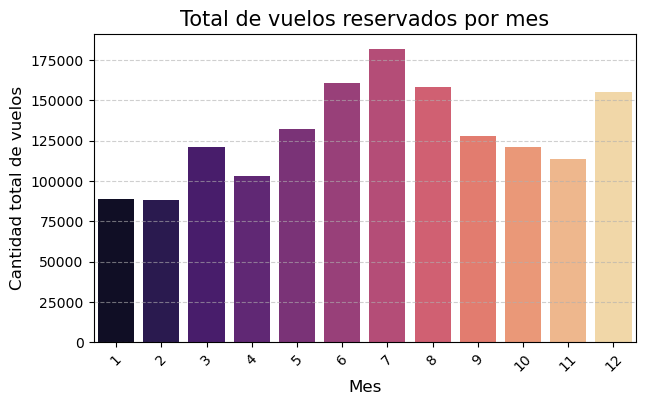

In [37]:
plt.figure(figsize=(7, 4))

# Si quieres ver el total acumulado de todos los años por mes:
sns.barplot(data=df_final, 
            x="month", 
            y="total_flights", 
            palette="magma", 
            estimator=sum, 
            errorbar=None)

print("Se observa un pico claro en los meses de verano, coincidiendo con vacaciones. \nTambién se observa un claro aumento en el mes de diciembre, coincidiendo con época de Navidad")

plt.title("Total de vuelos reservados por mes", fontsize=15)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Cantidad total de vuelos", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()



- ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

En este gráfico observamos lo ya comentado anteriormente: a mayor distancia de vuelo, mayor es la cantidad de puntos acumulados. 
Sin embargo, podemos observar cuatro tipos de tendencias en la sumatoria de puntos, probablemente relacionado con el tipo de 'loyalty_card' que posea cada cliente.


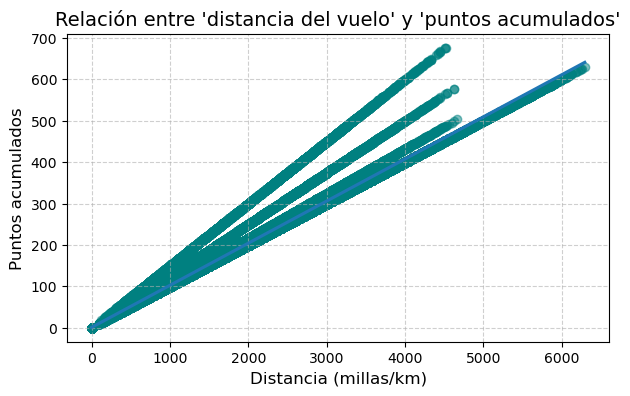

In [38]:
plt.figure(figsize=(7, 4))

# con regplot creamos una linea de tendencia.
sns.regplot(data=df_final, 
            x="distance", 
            y="points_accumulated", 
            scatter_kws={"alpha":0.5, 
                         "color":"teal"})

print("En este gráfico observamos lo ya comentado anteriormente: a mayor distancia de vuelo, mayor es la cantidad de puntos acumulados. \nSin embargo, podemos observar cuatro tipos de tendencias en la sumatoria de puntos, probablemente relacionado con el tipo de 'loyalty_card' que posea cada cliente.")

plt.title("Relación entre 'distancia del vuelo' y 'puntos acumulados'", fontsize=14)
plt.xlabel("Distancia (millas/km)", fontsize=12)
plt.ylabel("Puntos acumulados", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



En este gráfico confirmamos la hipótesis anterior: cada 'loyalty_card' tiene una tendencia distinta en la acumulación de puntos. 
La distancia, no es el único factor que determina los puntos. 
 Sin embargo, hay una cuarta línea de relación que sugiere que hay otra variable que afecta directamente en los puntos acumulados y no es la distancia de vuelo. 
Podrían ser los meses de vuelo o el canjeo de puntos. Debemos hacer una búsqueda más profunda de los posibles motivos.


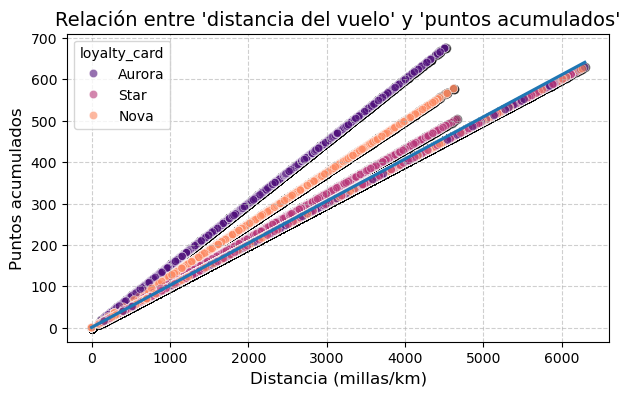

In [39]:
plt.figure(figsize=(7, 4))

# con regplot creamos una linea de tendencia.
sns.regplot(data=df_final, 
            x="distance", 
            y="points_accumulated", 
            scatter_kws={"alpha":0.5, 
                         "color":"black"})

# le añadimos color y contexto a nuestr
sns.scatterplot(data=df_final, 
                x="distance", 
                y="points_accumulated", 
                hue="loyalty_card", 
                palette="magma", 
                alpha=0.6)

print("En este gráfico confirmamos la hipótesis anterior: cada 'loyalty_card' tiene una tendencia distinta en la acumulación de puntos. \nLa distancia, no es el único factor que determina los puntos. \n Sin embargo, hay una cuarta línea de relación que sugiere que hay otra variable que afecta directamente en los puntos acumulados y no es la distancia de vuelo. \nPodrían ser los meses de vuelo o el canjeo de puntos. Debemos hacer una búsqueda más profunda de los posibles motivos.")

plt.title("Relación entre 'distancia del vuelo' y 'puntos acumulados'", fontsize=14)
plt.xlabel("Distancia (millas/km)", fontsize=12)
plt.ylabel("Puntos acumulados", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



Con este gráfico se observa que, a pesar de que todas las tarjetas de fidelidad tienen un ratio de puntos diferentes, todas tienen puntuaje en común. 
 Muy probablmente podría darse en temporada alta, por ejemplo.


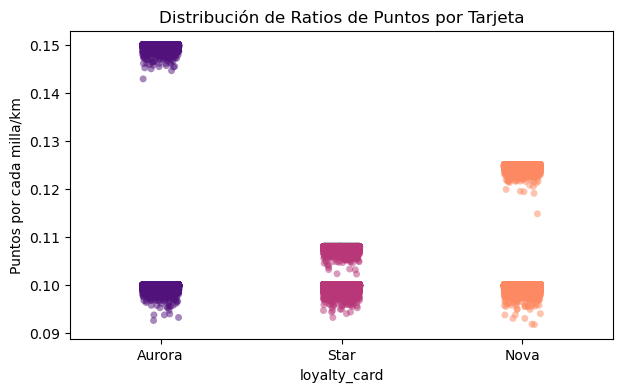

In [40]:
# Creamos una nueva columna en el DF donde se calcule el ratio de los puntos conseguidos a partir de dividir los puntos acumulados y las distancias de cada viaje.
df_final["point_ratio"] = df_final["points_accumulated"] / df_final["distance"]

plt.figure(figsize=(7, 4))
sns.stripplot(data=df_final, 
              x="loyalty_card", 
              y="point_ratio", 
              jitter=True,
              palette="magma", 
              alpha=0.5)

print("Con este gráfico se observa que, a pesar de que todas las tarjetas de fidelidad tienen un ratio de puntos diferentes, todas tienen puntuaje en común. \n Muy probablmente podría darse en temporada alta, por ejemplo.")

plt.title("Distribución de Ratios de Puntos por Tarjeta")
plt.ylabel("Puntos por cada milla/km")
plt.show()



- ¿Cuál es la distribución de los clientes por provincia o estado?

Se observa lo indicado anteriormente en el análisis preliminar: a mayor tamaño de área poblada, mayor cantidad de clientes.


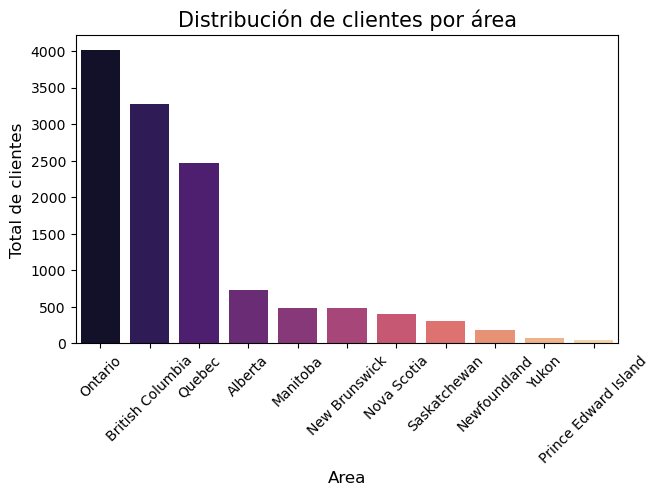

In [41]:
provincia_counts = df_loyalty["province"].value_counts()

plt.figure(figsize=(7, 4))
sns.barplot(x=provincia_counts.index, y=provincia_counts.values, palette="magma")
print("Se observa lo indicado anteriormente en el análisis preliminar: a mayor tamaño de área poblada, mayor cantidad de clientes.")

plt.title("Distribución de clientes por área", fontsize=15)
plt.xlabel("Area", fontsize=12)
plt.ylabel("Total de clientes", fontsize=12)
plt.xticks(rotation=45)
plt.show()



In [42]:
df_loyalty.groupby('province')['city'].nunique().sort_values(ascending=False)

# Podemos observar cuántas registros únicos tiene cada provincia. Si bien hay más registros en los grandes, no siempre es así. 
# Se puede advertir con Alberta y Quebec que, a pesar de tener las mismas ciudades, Alberta triplica la cantidad de registros.

province
Ontario                 7
British Columbia        6
Alberta                 4
Quebec                  4
New Brunswick           2
Manitoba                1
Newfoundland            1
Nova Scotia             1
Prince Edward Island    1
Saskatchewan            1
Yukon                   1
Name: city, dtype: int64

- ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

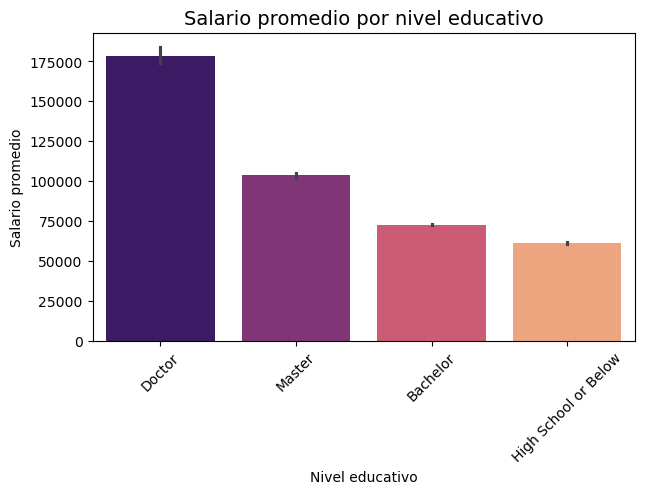

In [43]:
#En este caso, haremos el cálculo de salarios ignorando los datos nulos.
condicion_income = df_loyalty["salary"].notnull()
df_salary = df_loyalty.loc[condicion_income, :]
df_salary = df_salary[df_salary['salary'] >= 0] 

# Para facilitar la visualización de los datos, los agrupamos de manera descendente
orden_salario = df_salary.groupby("education")["salary"].mean().sort_values(ascending=False).index

plt.figure(figsize=(7, 4))
sns.barplot(data=df_salary, 
            x="education", 
            y="salary", 
            order=orden_salario, 
            palette="magma")

plt.title("Salario promedio por nivel educativo", fontsize=14)
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")
plt.xticks(rotation=45)
plt.show()

Podemos confirmar que el nivel educativo actúa como predictor del salario. 
Sin embargo, la precisión disminuye para el nivel 'Doctor', donde encontramos una dispersión muy alta en los datos. 
Encontramos en el grupo Doctor un outlier muy destacado, que podría estar afectando a la media del grupo.


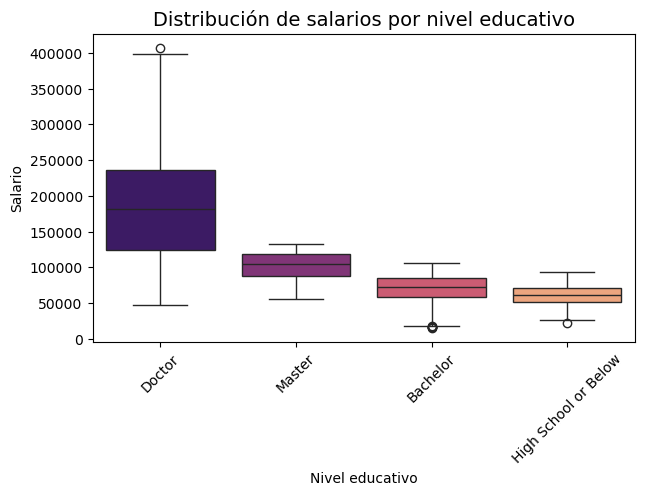

In [44]:
plt.figure(figsize=(7, 4))
sns.boxplot(x="education", 
            y="salary", 
            data=df_salary,
            order=orden_salario, 
            palette="magma")

print("Podemos confirmar que el nivel educativo actúa como predictor del salario. \nSin embargo, la precisión disminuye para el nivel 'Doctor', donde encontramos una dispersión muy alta en los datos. \nEncontramos en el grupo Doctor un outlier muy destacado, que podría estar afectando a la media del grupo.")

plt.title("Distribución de salarios por nivel educativo", fontsize=14)
plt.xlabel("Nivel educativo")
plt.ylabel("Salario")
plt.xticks(rotation=45)
plt.show()



Tras eliminar los datos de salario por encima de 400k, podemos observar que los percentiles siguen estando en la misma zona; 
por lo tanto aunque hubiera un dato que pareciera estar fuera de los límites, no afecta realmente a la estadística. 

Los resultados en salario para los clientes pertenecientes al grupo Doctor, tienen unos registros en sueldo que aportan peso a los datos mostrados en la imagen.


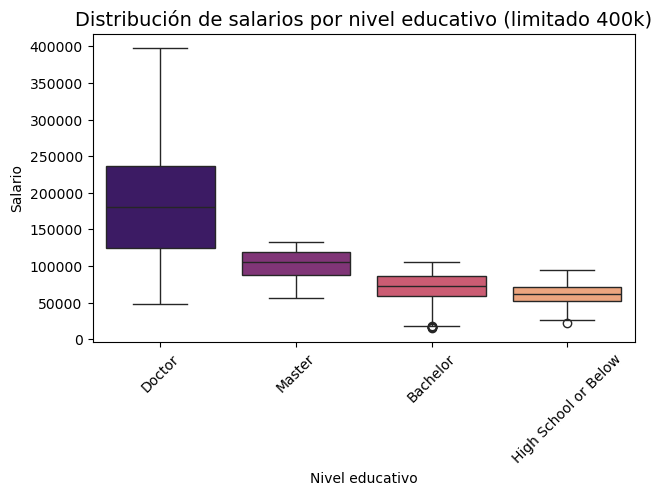

In [45]:
df_salary_limited = df_salary[df_salary["salary"] < 400000]

plt.figure(figsize=(7, 4))
sns.boxplot(x="education", 
            y="salary", 
            data=df_salary_limited,
            order=orden_salario, 
            palette="magma")

print(f"Tras eliminar los datos de salario por encima de 400k, podemos observar que los percentiles siguen estando en la misma zona; \npor lo tanto aunque hubiera un dato que pareciera estar fuera de los límites, no afecta realmente a la estadística. \n\nLos resultados en salario para los clientes pertenecientes al grupo Doctor, tienen unos registros en sueldo que aportan peso a los datos mostrados en la imagen.")

plt.title("Distribución de salarios por nivel educativo (limitado 400k)", fontsize=14)
plt.xlabel("Nivel educativo")
plt.ylabel("Salario")
plt.xticks(rotation=45)
plt.show()



- ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

Podemos encontrar que el grupo Star es el que más clientes tiene. 
Puede tratarse de la membresía básica, ya que se trata del grupo que menor ratio de ganancia de puntos posee.


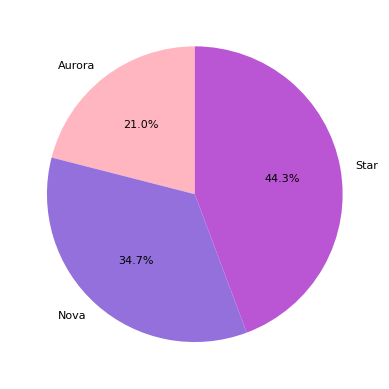

In [46]:
data = df_loyalty.groupby("loyalty_card")["loyalty_number"].sum()
colors = ["lightpink", "mediumpurple", "mediumorchid"]

plt.pie(data, 
        labels= data.index,
        autopct=  '%1.1f%%',
        colors = colors,
        textprops={'fontsize': 8}, 
        startangle=90)


print("Podemos encontrar que el grupo Star es el que más clientes tiene. \nPuede tratarse de la membresía básica, ya que se trata del grupo que menor ratio de ganancia de puntos posee.")

- ¿Cómo se distribuyen los clientes según su estado civil y género?

Con este gráfico observaremos el ratio mujer-hombre dentro de cada estado civil registrado en nuestra base de clientes. 
Como mencionamos anteriormente, el género no es un caracter diferenciador en la base de datos de clientes de la aeorlínea.


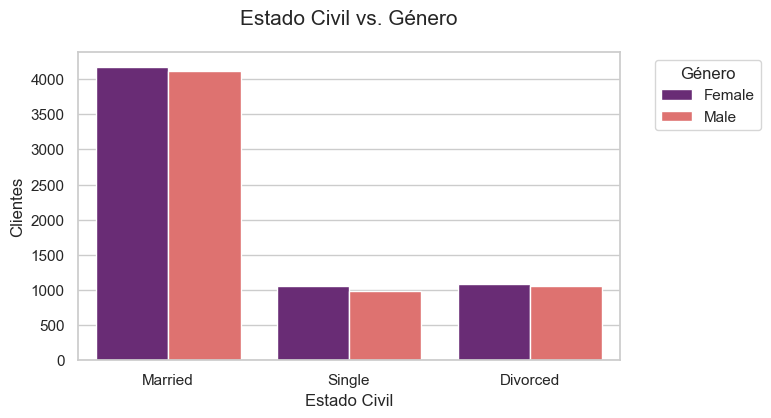

In [47]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7,4))

sns.countplot(
    data=df_loyalty, 
    x='marital_status', 
    hue='gender', 
    palette='magma')

plt.title('Estado Civil vs. Género', fontsize=15, pad=20)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Clientes', fontsize=12)
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')

print("Con este gráfico observaremos el ratio mujer-hombre dentro de cada estado civil registrado en nuestra base de clientes. \nComo mencionamos anteriormente, el género no es un caracter diferenciador en la base de datos de clientes de la aeorlínea.")

# Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los
pasos que deberás seguir son:
- Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.
- Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada
grupo.

In [48]:
df_booked_flight = df_final[["education", "flights_booked"]]
df_booked_flight.dropna()
promedio_total = df_booked_flight["flights_booked"].mean()


In [49]:
# Agrupación y cálculo de métricas de agregación
stats_education = df_booked_flight.groupby("education")["flights_booked"].agg(['count', 'mean', 'std', 'min', 'max'])
# stats_education.columns = ["Conteo", "Promedio", "Desviación Estándar", "Min", "Max"]

print(stats_education.sort_values(by="count", ascending=True))

                       count      mean       std  min  max
education                                                 
Master                 12336  4.184014  5.210294    0   21
Doctor                 17856  4.146281  5.250093    0   21
High School or Below   18984  4.157975  5.235462    0   21
Bachelor              253296  4.091691  5.216549    0   21


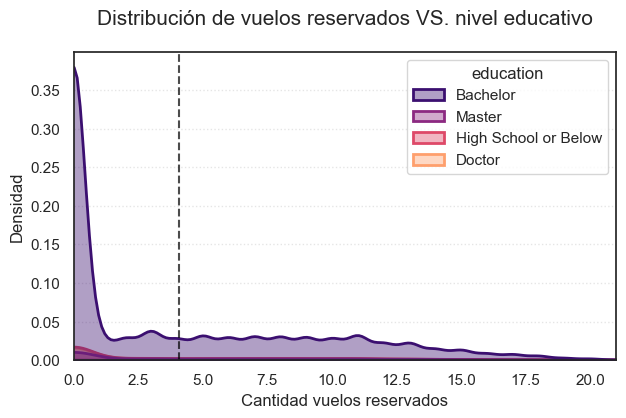

In [50]:
# 1. Configuración estética
sns.set_theme(style="white")
plt.figure(figsize=(7, 4))

# 2. Creación del gráfico de densidad (Campanas de Gauss estimadas)
sns.kdeplot(
    data=df_booked_flight, 
    x="flights_booked", 
    hue="education", 
    fill=True, 
    palette="magma", 
    alpha=0.4, 
    linewidth=2
)

# 3. Línea del promedio global para dar contexto a la Desviación Estándar
plt.axvline(x=promedio_total, 
            color="black", 
            linestyle="--", 
            alpha=0.7, 
            label="Promedio global")

# 4. Refinamiento de ejes
plt.title("Distribución de vuelos reservados VS. nivel educativo", fontsize=15, pad=20)
plt.xlabel("Cantidad vuelos reservados", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.xlim(0, 21)  # Basado en tus valores Min 0 y Máx 21
plt.grid(axis='y', linestyle=':', alpha=0.5)

plt.show()

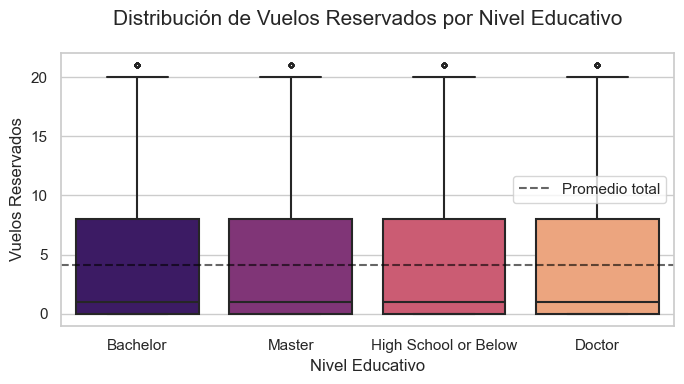

In [51]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 4))

# 3. Creación del Boxplot segmentado por Educación
# Aplicamos la paleta 'magma' para mantener la consistencia visual
sns.boxplot(
    data=df_booked_flight, 
    x='education', 
    y='flights_booked', 
    palette="magma",
    fliersize=3,      # Tamaño de los puntos outliers
    linewidth=1.5
)

# 4. Optimización de etiquetas (Jerga de análisis de datos)
plt.title("Distribución de Vuelos Reservados por Nivel Educativo", fontsize=15, pad=20)
plt.xlabel("Nivel Educativo", fontsize=12)
plt.ylabel("Vuelos Reservados", fontsize=12)

# Añadimos una línea horizontal en el promedio global que calculamos antes (4.15)
plt.axhline(y=promedio_total, 
            color="black", 
            linestyle="--", 
            alpha=0.6, 
            label="Promedio total")

plt.legend()
plt.tight_layout()
plt.show()

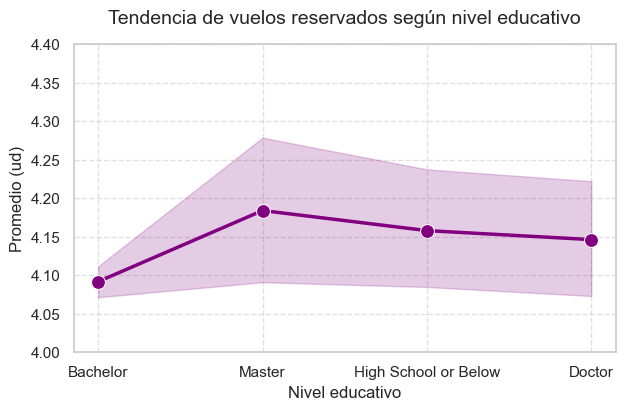

In [52]:
promedio_total = df_booked_flight['flights_booked'].mean()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 4))

sns.lineplot(
    data=df_booked_flight, 
    x="education", 
    y="flights_booked", 
    marker="o",
    markersize=10, 
    color="purple",
    linewidth=2.5,
)

# 3. Personalización profesional
plt.title("Tendencia de vuelos reservados según nivel educativo", fontsize=14, pad=15)
plt.xlabel("Nivel educativo", fontsize=12)
plt.ylabel("Promedio (ud)", fontsize=12)

# Ajustamos el eje Y para filtrar los datos. Al estar el promedio entre 4 y 4.3; de esta manera no saldrá muy pequeño en comparación con la gráfica
plt.ylim(4, 4.4) 

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Como podemos comprobar, la tendencia en las tres visualizaciones es prácticamente lineal, lo que confirma que ambas variables no están estrictamente relacionadas.

# BONUS

In [53]:
# 1. Definir fecha de referencia (Hoy)
# Si prefieres usar la fecha más reciente del dataset: fecha_ref = df_final['enrollment_date'].max()
fecha_ref = datetime.now()

# 2. Calcular la duración en días
# Usamos .fillna() para que los activos usen la fecha de referencia
df_final['customer_tenure_months'] = (df_final['cancellation_date'].fillna(fecha_ref) - df_final['enrollment_date']).dt.days / 30.44
df_final['customer_tenure_months'] = df_final['customer_tenure_months'].round(1)

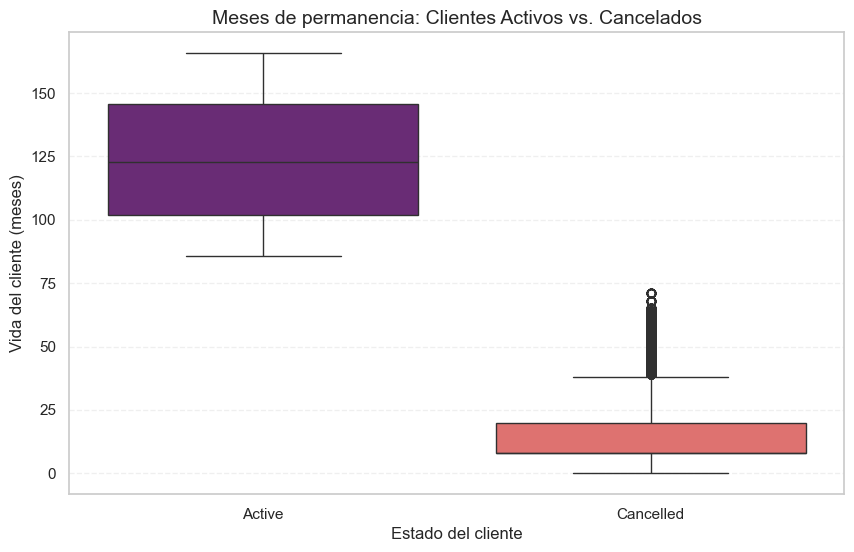

In [54]:
plt.figure(figsize=(10, 6))

# Visualizamos la distribución de meses según el Estatus
sns.boxplot(
    data=df_final, 
    x="status", 
    y="customer_tenure_months", 
    palette="magma"
)

plt.title("Meses de permanencia: Clientes Activos vs. Cancelados", fontsize=14)
plt.xlabel("Estado del cliente")
plt.ylabel("Vida del cliente (meses)")

plt.grid(axis="y", 
         linestyle="--", 
         alpha=0.3)

plt.show()

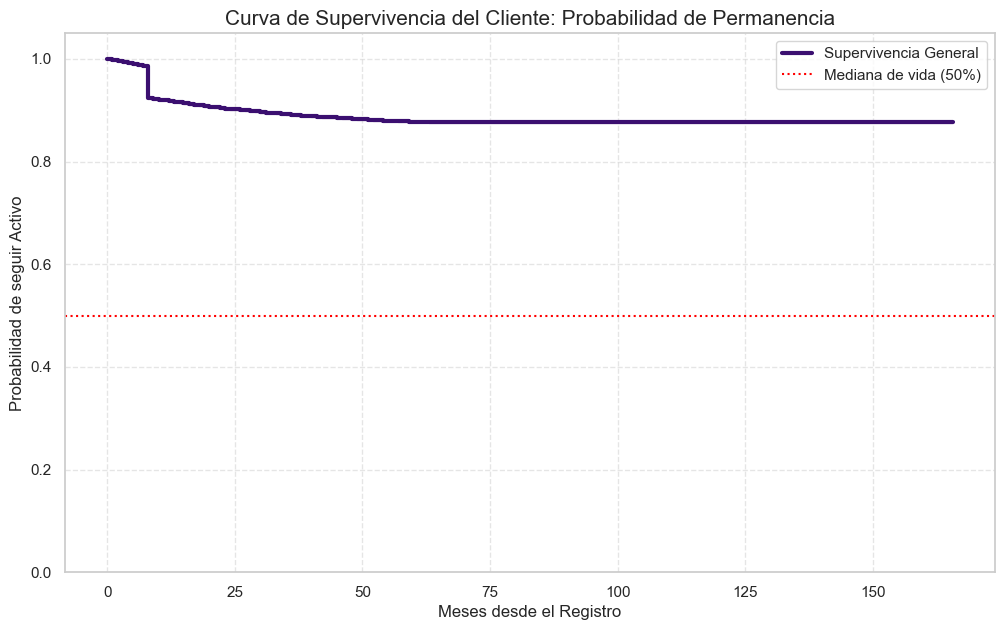

In [55]:
# 1. Preparar los datos
# 'T' es el tiempo (tenure en meses)
# 'E' es el evento (1 si canceló, 0 si sigue activo)
T = df_final['customer_tenure_months']
E = (df_final['status'] == 'Cancelled').astype(int)

# 2. Ajustar el modelo Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E, label='Supervivencia General')

# 3. Visualización con estética profesional
plt.figure(figsize=(12, 7))
kmf.plot_survival_function(color='#3b0f70', linewidth=3)

# Personalización
plt.title('Curva de Supervivencia del Cliente: Probabilidad de Permanencia', fontsize=15)
plt.xlabel('Meses desde el Registro', fontsize=12)
plt.ylabel('Probabilidad de seguir Activo', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)

# Añadir una línea en el 50% (Mediana de supervivencia)
plt.axhline(0.5, color='red', linestyle=':', label='Mediana de vida (50%)')

plt.legend()
plt.show()

Este último BONUS nos muestra la duración de media de los clientes en la empresa en meses. Se ve cómo los primeros 15-20 meses son críticos para el Churn. 

Una vez pasado este periodo, los clientes se mantienen fieles a lo largo de los años.

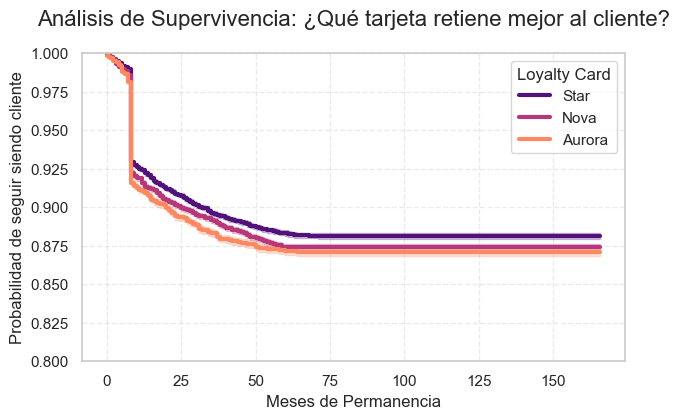

In [56]:
plt.figure(figsize=(7, 4))
kmf = KaplanMeierFitter()

# 2. Definir el orden de las tarjetas para la paleta de colores
# Esto asegura que 'Star' sea el color más oscuro y 'Aurora' el más claro/brillante
loyalty_cards = ['Star', 'Nova', 'Aurora']
colors = sns.color_palette("magma", n_colors=len(loyalty_cards))

# Iteramos específicamente por cada tipo de tarjeta
for i, card_type in enumerate(loyalty_cards):
    # Filtrar el dataframe por el tipo de tarjeta actual
    mask = (df_final['loyalty_card'] == card_type)
    
    # Si el grupo existe en los datos, ajustamos y graficamos
    if mask.any():
        kmf.fit(
            durations=df_final.loc[mask, 'customer_tenure_months'], 
            event_observed=(df_final.loc[mask, 'status'] == 'Cancelled').astype(int), 
            label=card_type
        )
        
        # Dibujamos la curva con su color correspondiente de la paleta magma
        kmf.plot_survival_function(color=colors[i], linewidth=3, ci_show=True)

# 4. Estética y anotaciones técnicas
plt.title('Análisis de Supervivencia: ¿Qué tarjeta retiene mejor al cliente?', fontsize=16, pad=20)
plt.xlabel('Meses de Permanencia', fontsize=12)
plt.ylabel('Probabilidad de seguir siendo cliente', fontsize=12)
plt.ylim(0.8, 1)
plt.legend(title='Loyalty Card', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()

Por último, representamos el mismo gráfico segmentándolo por los diferentes tipos de tarjeta de fidelidad, para comprobar si  hay alguna diferenenciación. 

Sin embargo, los datos muestran que no hay relación entre el tipo de tarjeta y la vida del cliente en la empresa